# Исследование объявлений о продаже квартир

### Описание проекта
В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Задачи исследования

### [1. Открытие файла с данными и изучение общей информации](#1)

- посмотрим начало и конец датасета
- сделаем предварительные выводы
- поищем аномалии


### [2. Предобработка данных](#2)

- определим и изучим пропущенные значения
- заполним пропуски, где это уместно
- приведём данные к нужным типам

### [3. Посчитаем и добавим в таблицу](#3)

- цену квадратного метра
- день недели, месяц и год публикации объявления
- этаж квартиры; варианты — первый, последний, другой
- соотношение жилой и общей площади, а также отношение площади кухни к общей

### [4. Исследовательский анализ и выполнение инструкций](#4)

- Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра. [тут](#4_1)
- Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго? [тут](#4_2)
- Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили. [тут](#4_3)
- Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года. [тут](#4_4)
- Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`.[тут](#4_5)
- Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге `locality_name`. Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона. [тут](#4_6)
- Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу? [тут](#4_7)

### [5. Общий вывод](#5)

- пишем общий вывод

### Описание данных

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

<a id="1"></a>

### 1. Изучение данных из файла

In [1]:
import pandas as pd                          # импорт библиотеки pandas
import numpy as np                           # импорт библиотеки numpy
df = pd.read_csv('real_estate_data.csv',sep='\t', decimal=',')

#редактиуем формат таблицы для лучшего всприятия
pd.set_option('display.max_columns', None)             #чтобы текст в ячейке отражался полностью вне зависимости от длины
pd.set_option('display.float_format', '{:.2f}'.format) # все числа отражаются с двумя знаками после запятой

df.head(10) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00000000000003
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,False,False,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
df.sample()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17636,10,2370000.0,46.0,2018-11-11T00:00:00,2,2.5,5.0,30.6,3,NaN,False,False,6.5,1.0,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,45.00000000000001


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23699 non-null  int64 
 1   last_price            23699 non-null  object
 2   total_area            23699 non-null  object
 3   first_day_exposition  23699 non-null  object
 4   rooms                 23699 non-null  int64 
 5   ceiling_height        14504 non-null  object
 6   floors_total          23613 non-null  object
 7   living_area           21796 non-null  object
 8   floor                 23699 non-null  int64 
 9   is_apartment          2775 non-null   object
 10  studio                23699 non-null  bool  
 11  open_plan             23699 non-null  bool  
 12  kitchen_area          21421 non-null  object
 13  balcony               12180 non-null  object
 14  locality_name         23650 non-null  object
 15  airports_nearest      18157 non-null

<a id="2"></a>

### 2. Предобработка данных

In [4]:
df.duplicated().sum() # смотрим дубликты

0

In [5]:
df.isna().sum() # смотрим пропуски, заменяем

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
df['ceiling_height']=pd.to_numeric(df['ceiling_height'],errors='coerce') #меняем тип данных

In [7]:
good_height = df.query('2.50<=ceiling_height<=3.50') #берем предел высоты потолка и ищем медианное значение, заменяем пропуски

df['ceiling_height'] = df['ceiling_height'].fillna(good_height['ceiling_height'].median())


In [8]:
df['floors_total'] = df['floors_total'].fillna(df['floor']) #пропуски этажности дома заменяем на этаж


In [9]:
df['is_apartment'] = df['is_apartment'].fillna(False) # пропуски на False

In [10]:
df['balcony'] = df['balcony'].fillna(0) # пропуски на 0, если не указали балконы значит их нет

In [11]:
df['locality_name'] = df['locality_name'].fillna('Не известно') # пропуски в названиях на 'Не известно'
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True) # 'ё'на е', бросается в глаза
df['locality_name'].head(5)

0    Санкт-Петербург
1     поселок Шушары
2    Санкт-Петербург
3    Санкт-Петербург
4    Санкт-Петербург
Name: locality_name, dtype: object

In [12]:
# меняем тип данных в столбцах, т.к. будем прозводить вычсления в этих столбцах
df[['floors_total','kitchen_area','last_price','living_area','total_area', 'balcony','days_exposition','cityCenters_nearest']] = \
df[['floors_total','kitchen_area','last_price','living_area','total_area', 'balcony','days_exposition','cityCenters_nearest']]\
.apply(pd.to_numeric,errors='coerce')

df.info() #проверяем
                     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [13]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,cityCenters_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699.00,23699.00,23699.00,21796.00,23699.00,21421.00,23699.00,18180.00,20518.00
mean,9.86,6541548.77,60.35,2.07,2.72,10.67,34.46,5.89,10.57,0.59,14191.28,180.89
std,5.68,10887013.27,35.65,1.08,0.99,6.60,22.03,4.89,5.91,0.96,8608.39,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,181.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.60,5.00,18.60,2.00,7.00,0.00,9238.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,0.00,13098.50,95.00
75%,14.00,6800000.00,69.90,3.00,2.70,16.00,42.30,8.00,12.00,1.00,16293.00,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,65968.00,1580.00


In [14]:
# поработали с площадью кухни
ff=df.query('rooms != 0 and living_area > 30 ')
m_k_a=df.pivot_table(index=[ff['rooms'], ff['living_area']], columns='balcony', values='kitchen_area', aggfunc='median')


In [15]:
def median_kitchen_area(rooms,living_area,balcony):
    
    try:
        return m_k_a.loc[(rooms,living_area)][balcony]
    except:
        return 0

df.apply(lambda row: median_kitchen_area(row['rooms'], row['living_area'], row['balcony']), axis=1) 

0       13.65
1        0.00
2       11.80
3        0.00
4        9.00
         ... 
23694   13.83
23695    7.00
23696    0.00
23697    0.00
23698    0.00
Length: 23699, dtype: float64

In [16]:
df['kitchen_area'] = df['kitchen_area'].\
fillna(df.apply(lambda row: median_kitchen_area(row['rooms'], row['living_area'], row['balcony']), axis=1))

In [17]:
df['kitchen_area'].isna().sum()


14

In [18]:
df['kitchen_area'].fillna(df['kitchen_area'].median(), inplace=True) # 'эти 14 пропусков заполним медианным значением

In [19]:
# Теперь ко дню публикации объявления
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

In [20]:
# поработали с жилой площадью 
gg=df.query('rooms != 0 and total_area > 30 ')
m_l_a=df.pivot_table(index=[gg['total_area']], columns='rooms', values='living_area', aggfunc='median')

In [21]:
def median_living_area(rooms,total_area):
    try:
        return m_l_a.loc[(total_area)][rooms]
    except:
        return 0

df.apply(lambda row: median_living_area(row['rooms'], row['total_area']), axis=1) 

0       57.30
1       18.60
2       32.00
3       54.00
4       44.50
         ... 
23694   73.30
23695   39.90
23696   33.00
23697    0.00
23698   16.65
Length: 23699, dtype: float64

In [22]:
df['living_area'] = df['living_area'].\
fillna(df.apply(lambda row: median_living_area(row['rooms'], row['total_area']), axis=1))

In [23]:
df['living_area'].isna().sum() #проверяем

64

In [24]:
df['living_area'].fillna(df['living_area'].median(), inplace=True) # заполняем остаток

In [25]:
df.isna().sum().sort_values()/df.shape[0]*100 # смотрим процентное содержание пропусков

total_images            0.00
locality_name           0.00
balcony                 0.00
kitchen_area            0.00
open_plan               0.00
is_apartment            0.00
floor                   0.00
studio                  0.00
floors_total            0.00
ceiling_height          0.00
rooms                   0.00
first_day_exposition    0.00
total_area              0.00
last_price              0.00
living_area             0.00
days_exposition        13.42
parks_around3000       23.28
ponds_around3000       23.28
cityCenters_nearest    23.29
airports_nearest       23.38
ponds_nearest          61.56
parks_nearest          65.91
dtype: float64

##### Вывод
Остальные пропуски выглядят некритично, люди могут не знать метры до объектов или им может быть лениво заполнять число водоемов и парков в радиусе  3км, оставляем.

<a id="3"></a>

### 3. Расчёты и добавление результатов в таблицу

In [26]:
# Добавим цену квадратного метра
df['price_per_meter'] = df['last_price'] / df['total_area']
df['price_per_meter'] = df['price_per_meter'].round(decimals=2)

In [27]:
# Добавим столбцы c днем, месяцем и годом
df['day_of_week_exposition'] = df['first_day_exposition'].dt.day_name()
df['month_exposition'] = df['first_day_exposition'].dt.month_name()
df['year_exposition'] = df['first_day_exposition'].dt.year

In [28]:
# Добавим этажи
def floor_status(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_status'] = df.apply(floor_status, axis=1)    

In [29]:
#Добавим соотношение жилой и общей площади, а также отношение площади кухни к общей
df['total_living_area_ratio'] = df['living_area'] / df['total_area']
df['total_kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']


In [30]:
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_of_week_exposition,month_exposition,year_exposition,floor_status,total_living_area_ratio,total_kitchen_area_ratio
0,20,13000000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,0.00,Санкт-Петербург,18863.0,16028.00,1.0,482.0,2.0,755.0,NaN,120370.37,Thursday,March,2019,другой,0.47,0.23
1,7,3350000.00,40.40,2018-12-04,1,2.65,11.00,18.60,1,False,False,False,11.00,2.00,поселок Шушары,12817.0,18603.00,0.0,NaN,0.0,NaN,81.00,82920.79,Tuesday,December,2018,первый,0.46,0.27
2,10,5196000.00,56.00,2015-08-20,2,2.65,5.00,34.30,4,False,False,False,8.30,0.00,Санкт-Петербург,21741.0,13933.00,1.0,90.0,2.0,574.0,558.00,92785.71,Thursday,August,2015,другой,0.61,0.15
3,0,64900000.00,159.00,2015-07-24,3,2.65,14.00,54.00,9,False,False,False,0.00,0.00,Санкт-Петербург,28098.0,6800.00,2.0,84.0,3.0,234.0,424.00,408176.10,Friday,July,2015,другой,0.34,0.00
4,2,10000000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,False,False,False,41.00,0.00,Санкт-Петербург,31856.0,8098.00,2.0,112.0,1.0,48.0,121.00,100000.00,Tuesday,June,2018,другой,0.32,0.41


<a id="4"></a>

### 4. Исследовательский анализ данных

<a id="4_1"></a>

#####  Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

<a id="warnings"></a>

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
import matplotlib.pyplot as plt 

12.0 900.0


array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

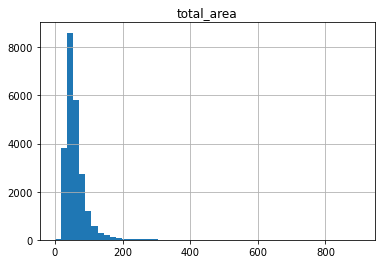

In [33]:
print(df['total_area'].min(),df['total_area'].max())
df[['total_area']].hist(bins=50,range = (0, 900))


<a id='total_area1'></a>

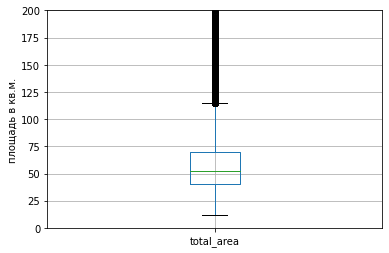

In [34]:
plt.ylim(0,200)

df.boxplot(['total_area']).set_ylabel('площадь в кв.м.') 
plt.show()

In [35]:
df[['total_area']].describe() 

,total_area
count,23699.00
mean,60.35
std,35.65
min,12.00
25%,40.00
50%,52.00
75%,69.90
max,900.00


Нижний «ус» упирается в 12, минимальное значение. Верхний заканчивается около 115  — это примерно 1,5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом

12190.0 763000000.0


array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

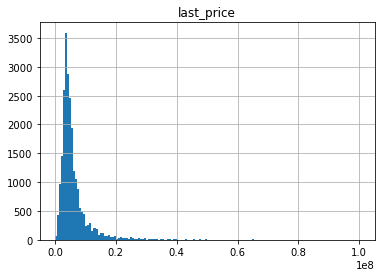

In [36]:
print(df['last_price'].min(),df['last_price'].max())
df[['last_price']].hist(bins=150,range = (12190, 100e6))

<a id='last_price1'></a>

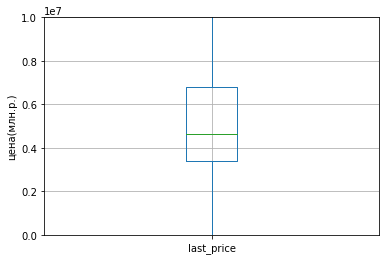

In [37]:
plt.ylim(-50,10e6)

df.boxplot(['last_price']).set_ylabel('цена(млн.р.)')  
plt.show()

In [38]:
df[['last_price']].describe() 

,last_price
count,23699.00
mean,6541548.77
std,10887013.27
min,12190.00
25%,3400000.00
50%,4650000.00
75%,6800000.00
max,763000000.00


Стандартное отклонение велико, в наборе данных могут быть серьёзные аномалии или выбросы.

0 19


array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

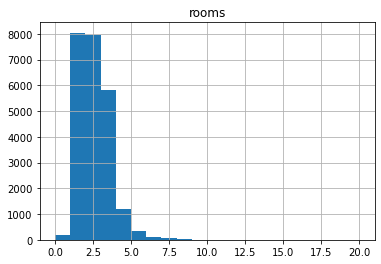

In [39]:
print(df['rooms'].min(),df['rooms'].max())
df[['rooms']].hist(bins=20,range = (0, 20))

<a id='rooms1'></a>

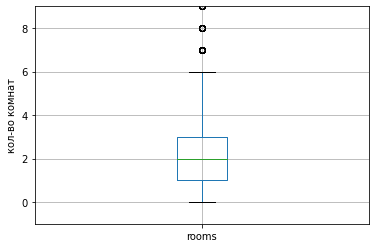

In [40]:
plt.ylim(-1,9)

df.boxplot(['rooms']).set_ylabel('кол-во комнат')  
plt.show() 

In [41]:
df[['rooms']].describe() 

,rooms
count,23699.00
mean,2.07
std,1.08
min,0.00
25%,1.00
50%,2.00
75%,3.00
max,19.00


Нижний «ус» упирается в 0, минимальное значение, виим это студии. Верхний заканчивается на 6  — это примерно 1,5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом.

1.0 100.0


array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

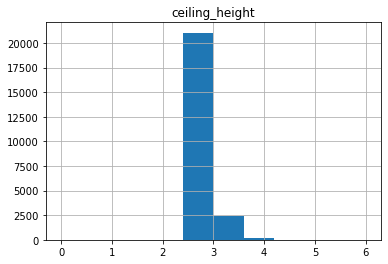

In [42]:
print(df['ceiling_height'].min(),df['ceiling_height'].max())
df[['ceiling_height']].hist(bins=10,range = (0, 6))

<a id='ceiling_height1'></a>

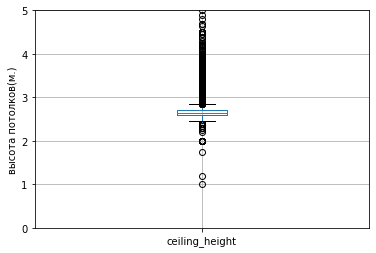

In [43]:
plt.ylim(0,5)

df.boxplot(['ceiling_height']).set_ylabel('высота потолков(м.)')  
plt.show()  

In [44]:
df[['ceiling_height']].describe() 

,ceiling_height
count,23699.00
mean,2.72
std,0.99
min,1.00
25%,2.60
50%,2.65
75%,2.70
max,100.00


меньше певого квартиля и примерно 1,5 межквартильного размаха, добавленного к 3-му квартилю, все что не входит в пределы - выбросы

<a id='days_exposition0'></a>

1.0 1580.0


array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

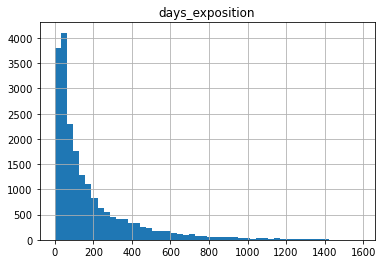

In [45]:
print(df['days_exposition'].min(),df['days_exposition'].max())
df[['days_exposition']].hist(bins=50,range = (0, 1580))

<a id='days_exposition1'></a>

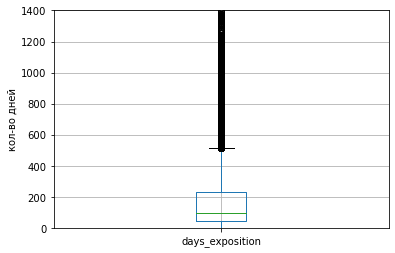

In [46]:
plt.ylim(0,1400)

df.boxplot(['days_exposition']).set_ylabel('кол-во дней')  
plt.show()   

In [47]:
df[['days_exposition']].describe() 

,days_exposition
count,20518.00
mean,180.89
std,219.73
min,1.00
25%,45.00
50%,95.00
75%,232.00
max,1580.00


Стандартное отклонение велико, в наборе данных могут быть серьёзные аномалии или выбросы.

<a id="4_3"></a>

##### Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

Необычных параметров достаточно:

* максимальная площадь в 900 метров в квадрате
* цена мнимальная 12190
* комнат 19, хотя... может быть и 19 комнат)
* высота потолка в 1 метр и в 100 метров
* мах время продажи более 4 лет

In [48]:
df[['total_area', 'last_price','rooms','ceiling_height','days_exposition']].describe()

,total_area,last_price,rooms,ceiling_height,days_exposition
count,23699.00,23699.00,23699.00,23699.00,20518.00
mean,60.35,6541548.77,2.07,2.72,180.89
std,35.65,10887013.27,1.08,0.99,219.73
min,12.00,12190.00,0.00,1.00,1.00
25%,40.00,3400000.00,1.00,2.60,45.00
50%,52.00,4650000.00,2.00,2.65,95.00
75%,69.90,6800000.00,3.00,2.70,232.00
max,900.00,763000000.00,19.00,100.00,1580.00


In [49]:
# функция для удаления выбросов
def del_out(df, column,graphic=0,x=10,y=10):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    i = (df[column] >= (q1 - 1.5*iqr)) & (df[column] <= (q3 + 1.5*iqr))
    if graphic == 1:
        return df.loc[i].boxplot([column], figsize=(x,y))
    else:
        return df.loc[i]

<a id='total_area2'></a>

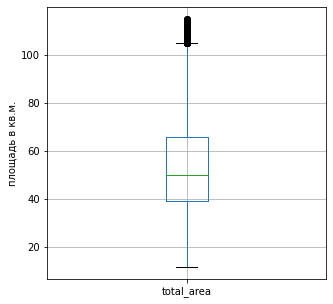

In [50]:
del_out(df,'total_area',1,5,5).set_ylabel('площадь в кв.м.')
plt.show()

In [51]:
del_out(df,'total_area',0)['total_area'].mean() # средняя площадь без выбросов
print('Площадь c выбросами:', round(df['total_area'].mean(),2))
print('Площадь без выбросов:', round(del_out(df,'total_area',0)['total_area'].mean(),2))


Площадь c выбросами: 60.35
Площадь без выбросов: 54.36


[Диаграмма размаха площади c выбросами](#total_area1)

[Диаграмма размаха площади без выбросов](#total_area2)

<a id='last_price2'></a>

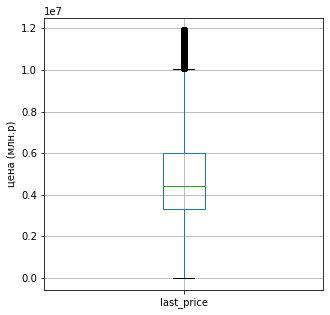

In [52]:
del_out(df,'last_price',1,5,5).set_ylabel('цена (млн.р)')
plt.show()

In [53]:
del_out(df,'last_price',0)['last_price'].mean() # средняя цена без выбросов
print('Цена c выбросами:', round(df['last_price'].mean(),2))
print('Цена без выбросов:', round(del_out(df,'last_price',0)['last_price'].mean(),2))


Цена c выбросами: 6541548.77
Цена без выбросов: 4848768.31


[Диаграмма размаха цены c выбросами](#last_price1)

[Диаграмма размаха цены без выбросов](#last_price2)

<a id='rooms2'></a>

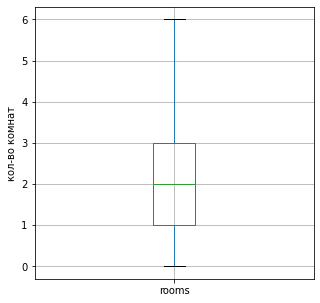

In [54]:
del_out(df,'rooms',1,5,5).set_ylabel('кол-во комнат')
plt.show()

In [55]:
del_out(df,'rooms',0)['rooms'].mean() # средняя кол-во комнат без выбросов
print('Кол-во комнат c выбросами:', round(df['rooms'].mean()))
print('Кол-во комнат без выбросов:', round(del_out(df,'rooms',0)['rooms'].mean()))


Кол-во комнат c выбросами: 2
Кол-во комнат без выбросов: 2


[Диаграмма размаха кол-во комнатc выбросами](#rooms1)

[Диаграмма размаха кол-во комнат без выбросов](#rooms2)

<a id='ceiling_height2'></a>

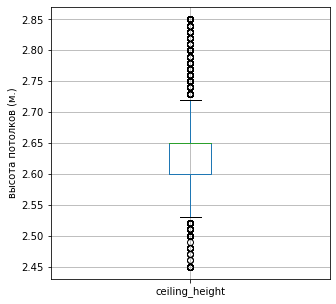

In [56]:
del_out(df,'ceiling_height',1,5,5).set_ylabel('высота потолков (м.)')
plt.show()

In [57]:
del_out(df,'ceiling_height',0)['ceiling_height'].mean() # средняя высота потолков без выбросов
print('Высота потолков c выбросами:', round(df['ceiling_height'].mean(),2))
print('Высота потолков без выбросов:', round(del_out(df,'ceiling_height',0)['ceiling_height'].mean(),2))

Высота потолков c выбросами: 2.72
Высота потолков без выбросов: 2.63


[Диаграмма размаха высота потолков c выбросами](#ceiling_height1)

[Диаграмма размаха высота потолков без выбросов](#ceiling_height2)

<a id="4_2"></a>

#####  Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

[гистограмма](#days_exposition0)

<a id='days_exposition2'></a>

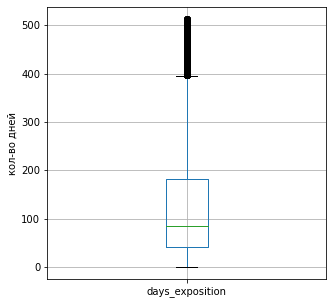

In [58]:
del_out(df,'days_exposition',1,5,5).set_ylabel('кол-во дней')
plt.show()

In [59]:
del_out(df,'days_exposition',0)['days_exposition'].mean() # средняя время продажи без выбросов

print('Время продажи c выбросами:', round(df['days_exposition'].mean()/30))
print('Время продажи без выбросов:', round(del_out(df,'days_exposition',0)['days_exposition'].mean()/30))
print('Медиана c выбросами:', round(df['days_exposition'].median()/30))
print('Медиана без выбросов:', round(del_out(df,'days_exposition',0)['days_exposition'].median()/30))

Время продажи c выбросами: 6
Время продажи без выбросов: 4
Медиана c выбросами: 3
Медиана без выбросов: 3


[Диаграмма размаха время продажи c выбросами](#days_exposition1)

[Диаграмма размаха время продажи без выбросов](#days_exposition2)

##### Вывод
* Обычно, продажа квартиры занимает около 4-х месяцев, продажи прошли очень быстро - если продажа состоялась менее чем за 3 месяца, продажи прошли необычно долго - если продажа состоялась за 6 месяцев.

In [60]:
df1=pd.DataFrame({'Характеристики':['Площадь','Кол-во комнат', 'Высота потолков', 'Стоимость квартиры','Время продажи (мес.)'],\
                    'c выбросами': [round(df['total_area'].mean(),2), round(df['rooms'].mean()),\
                                    round(df['ceiling_height'].mean(),2),\
                                    round(df['last_price'].mean(),2), round(df['days_exposition'].mean()/30)],\
                    'без выбросов':[round(del_out(df,'total_area',0)['total_area'].mean(),2),\
                                    round(del_out(df,'rooms',0)['rooms'].mean()),\
                                    round(del_out(df,'ceiling_height',0)['ceiling_height'].mean(),2),\
                                    round(del_out(df,'last_price',0)['last_price'].mean(),2),\
                                    round(del_out(df,'days_exposition',0)['days_exposition'].mean()/30)]})
display('Cредние параметры',df1)

'Cредние параметры'

,Характеристики,c выбросами,без выбросов
0,Площадь,60.35,54.36
1,Кол-во комнат,2.00,2.00
2,Высота потолков,2.72,2.63
3,Стоимость квартиры,6541548.77,4848768.31
4,Время продажи (мес.),6.00,4.00


In [61]:
df['total_area'] = del_out(df,'total_area')['total_area'] # удаляем выбросы, перезаписываем столбец

In [62]:
df['rooms'] = del_out(df,'rooms')['rooms'] # удаляем выбросы, перезаписываем столбец

In [63]:
df['ceiling_height'] = del_out(df,'ceiling_height')['ceiling_height'] # удаляем выбросы, перезаписываем столбец

In [64]:
df['last_price'] = del_out(df,'last_price')['last_price'] # удаляем выбросы, перезаписываем столбец

In [65]:
df['days_exposition'] = del_out(df,'days_exposition')['days_exposition'] # удаляем выбросы, перезаписываем столбец

In [66]:
q1 = df['total_area'].quantile(0.25)                 
q3 = df['total_area'].quantile(0.75)
iqr = q3 - q1
left = (q1 - 1.5*iqr)
right = (q3 + 1.5*iqr)

df.query('total_area >= @left & total_area <= @right')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_of_week_exposition,month_exposition,year_exposition,floor_status,total_living_area_ratio,total_kitchen_area_ratio
1,7,3350000.00,40.40,2018-12-04,1.00,2.65,11.00,18.60,1,False,False,False,11.00,2.00,поселок Шушары,12817.0,18603.00,0.0,NaN,0.0,NaN,81.00,82920.79,Tuesday,December,2018,первый,0.46,0.27
2,10,5196000.00,56.00,2015-08-20,2.00,2.65,5.00,34.30,4,False,False,False,8.30,0.00,Санкт-Петербург,21741.0,13933.00,1.0,90.0,2.0,574.0,NaN,92785.71,Thursday,August,2015,другой,0.61,0.15
4,2,10000000.00,100.00,2018-06-19,2.00,NaN,14.00,32.00,13,False,False,False,41.00,0.00,Санкт-Петербург,31856.0,8098.00,2.0,112.0,1.0,48.0,121.00,100000.00,Tuesday,June,2018,другой,0.32,0.41
5,10,2890000.00,30.40,2018-09-10,1.00,2.65,12.00,14.40,5,False,False,False,9.10,0.00,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00,95065.79,Monday,September,2018,другой,0.47,0.30
6,6,3700000.00,37.30,2017-11-02,1.00,2.65,26.00,10.60,6,False,False,False,14.40,1.00,поселок Парголово,52996.0,19143.00,0.0,NaN,0.0,NaN,155.00,99195.71,Thursday,November,2017,другой,0.28,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000.00,62.40,2016-08-05,3.00,2.60,9.00,40.00,8,False,False,False,8.00,0.00,Петергоф,45602.0,34104.00,1.0,352.0,1.0,675.0,239.00,73717.95,Friday,August,2016,другой,0.64,0.13
23695,14,3100000.00,59.00,2018-01-15,3.00,2.65,5.00,38.00,4,False,False,False,8.50,0.00,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00,52542.37,Monday,January,2018,другой,0.64,0.14
23696,18,2500000.00,56.70,2018-02-11,2.00,2.65,3.00,29.70,1,False,False,False,0.00,0.00,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44091.71,Sunday,February,2018,первый,0.52,0.00
23697,13,11475000.00,76.75,2017-03-28,2.00,NaN,17.00,0.00,12,False,False,False,23.30,2.00,Санкт-Петербург,39140.0,10364.00,2.0,173.0,3.0,196.0,NaN,149511.40,Tuesday,March,2017,другой,0.00,0.30


##### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [67]:
corr = df[['last_price',\
           'total_area',\
           'rooms',\
           'cityCenters_nearest',\
           'days_exposition']].corr()
corr

,last_price,total_area,rooms,cityCenters_nearest,days_exposition
last_price,1.00,0.70,0.45,-0.35,0.05
total_area,0.70,1.00,0.79,-0.18,0.11
rooms,0.45,0.79,1.00,-0.17,0.11
cityCenters_nearest,-0.35,-0.18,-0.17,1.00,-0.02
days_exposition,0.05,0.11,0.11,-0.02,1.00


In [68]:
corr.style.background_gradient(cmap='coolwarm')# в цвете)

,last_price,total_area,rooms,cityCenters_nearest,days_exposition
last_price,1.000000,0.695302,0.452862,-0.345619,0.049853
total_area,0.695302,1.000000,0.789250,-0.183571,0.109284
rooms,0.452862,0.789250,1.000000,-0.173809,0.108641
cityCenters_nearest,-0.345619,-0.183571,-0.173809,1.000000,-0.024957
days_exposition,0.049853,0.109284,0.108641,-0.024957,1.000000


<AxesSubplot:xlabel='total_area'>

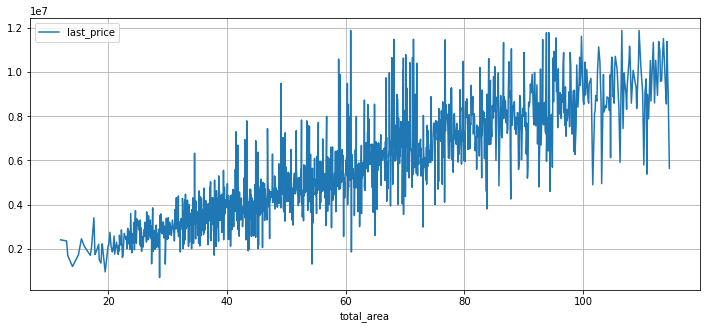

In [69]:
(
    df.pivot_table(index=['total_area'], values='last_price')
    .plot(grid=True, figsize=(12, 5))
) 

<AxesSubplot:xlabel='rooms'>

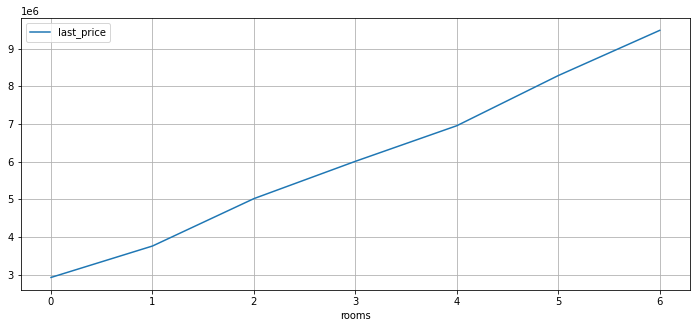

In [70]:
(
    df.pivot_table(index=['rooms'], values='last_price')
    .plot(grid=True, figsize=(12, 5))
) 

<AxesSubplot:xlabel='cityCenters_nearest'>

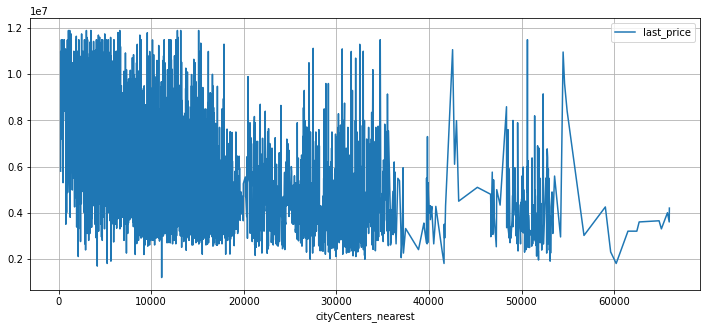

In [71]:
(
    df.pivot_table(index='cityCenters_nearest', values='last_price')
    .plot(grid=True, figsize=(12, 5))
) 

<AxesSubplot:xlabel='days_exposition'>

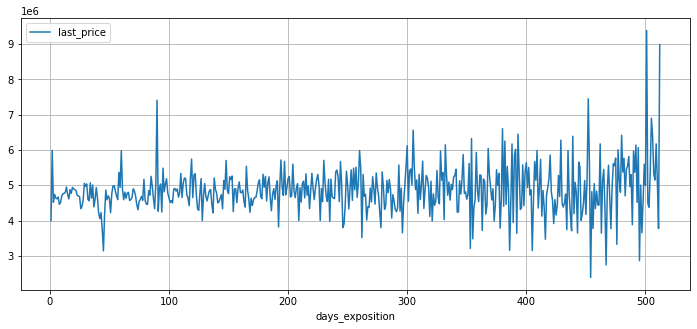

In [72]:
(
    df.pivot_table(index='days_exposition', values='last_price')
    .plot(grid=True, figsize=(12, 5))
) 


Факторы больше всего влияющие на стоимость квартиры:
* площадь квартиры,
* кол-во комнат.


(0.0, 10000000.0)

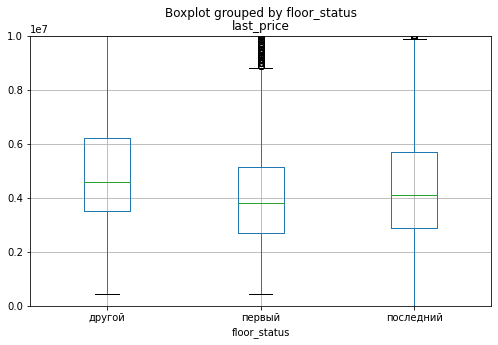

In [73]:
df.boxplot('last_price', by='floor_status',figsize=(8,5)).set_ylim(0,10e6) # этажность с выбросами

(0.0, 10000000.0)

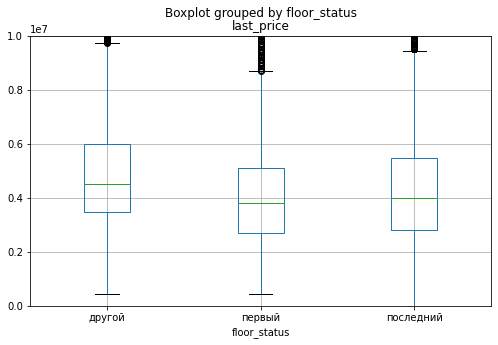

In [74]:
del_out(df,'last_price',0).boxplot('last_price', by='floor_status',figsize=(8,5)).set_ylim(0,10e6) # этажность без выбросов


С выбросами и без, цена для первых этажей ниже чем для последних, а те ниже других.

(0.0, 10000000.0)

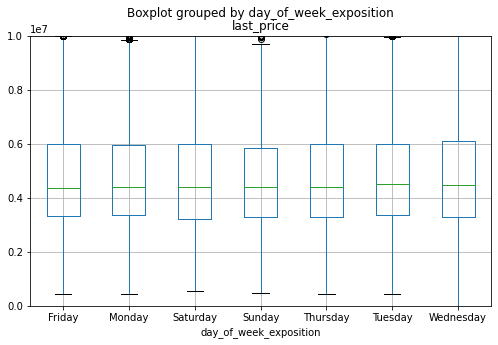

In [75]:
df.boxplot('last_price', by='day_of_week_exposition',figsize=(8,5)).set_ylim(0,10e6) # дни недели

(0.0, 10000000.0)

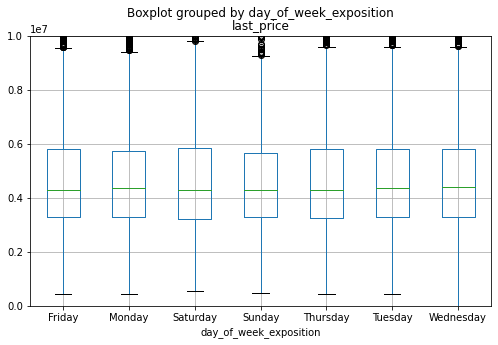

In [76]:
del_out(df,'last_price',0).boxplot('last_price', by='day_of_week_exposition',figsize=(8,5)).set_ylim(0,10e6)

##### Вывод
С выбросами и без, цена примерна одинакова для дней недели.

(0.0, 10000000.0)

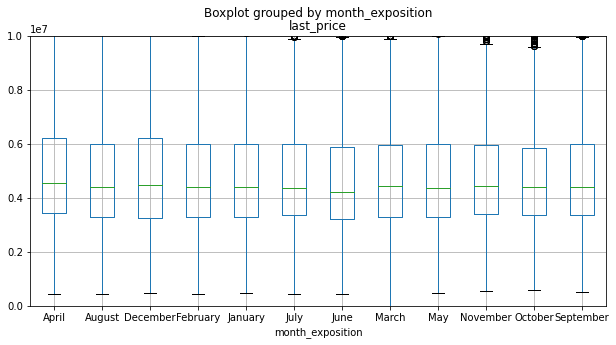

In [77]:
df.boxplot('last_price', by='month_exposition',figsize=(10,5)).set_ylim(0,10e6) # месяца

(0.0, 10000000.0)

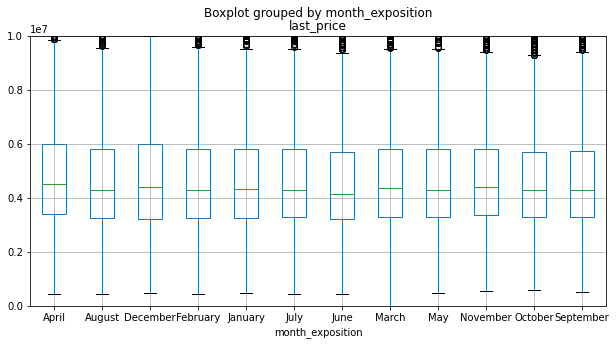

In [78]:
del_out(df,'last_price',0).boxplot('last_price', by='month_exposition',figsize=(10,5)).set_ylim(0,10e6)


С выбросами и без, цена примерна одинакова для месяцев, хотя незначительное понижение цены прослеживается в июне, а повышение в апреле.

(0.0, 10000000.0)

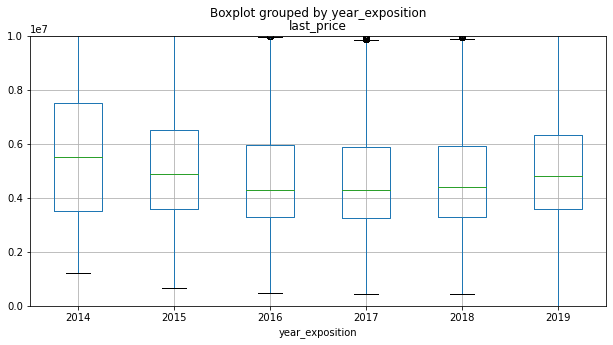

In [79]:
df.boxplot('last_price', by='year_exposition',figsize=(10,5)).set_ylim(0,10e6) # года

(0.0, 10000000.0)

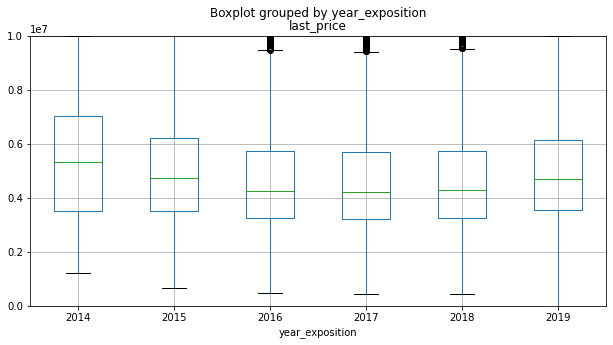

In [80]:
del_out(df,'last_price',0).boxplot('last_price', by='year_exposition',figsize=(10,5)).set_ylim(0,10e6)


Без выбросов более менее понятно, была зывышена цена в 2014 г постепено спустилась к 2016г и постепенно поднялась к 2019г.

##### Вывод:
* Как и ожидалось более всего вляет на стимость квартиры это количесво комнат(соответствено площадь квартиры) и удаленность от центра, а также этажность, первые этажи не пользуются популярностью.
* Если говоить по годам то в 2019 г цена стала выше чем в 2016г и, как ни странно, немного повышеная цена наблюдалась в апреле во втоник)

<a id="4_5"></a>

##### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

In [81]:
df = df.replace('поселок Мурино', 'Мурино')

In [82]:
df['locality_name'].value_counts().sort_values(ascending=False).head(10)

Санкт-Петербург      15721
Мурино                 590
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [83]:
def big_number_ads_town(row):
    if row['locality_name'] == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    else:
        return 'Лен.область'

In [84]:
df['big_number_ads_town'] = df.apply(big_number_ads_town, axis=1)

In [85]:

top_10_price = df.groupby('locality_name').agg({'big_number_ads_town':'count','price_per_meter':'mean'})

top_10_price = top_10_price.sort_values('big_number_ads_town', ascending=False).head(10)
top_10_price.sort_values('price_per_meter', ascending=False).head(10)

,big_number_ads_town,price_per_meter
locality_name,,
Санкт-Петербург,15721,114849.01
Пушкин,369,103125.82
деревня Кудрово,299,92473.55
поселок Парголово,327,90175.91
Мурино,590,86087.51
поселок Шушары,440,78677.36
Колпино,338,75424.58
Гатчина,307,68746.15
Всеволожск,398,68654.47


<AxesSubplot:ylabel='locality_name'>

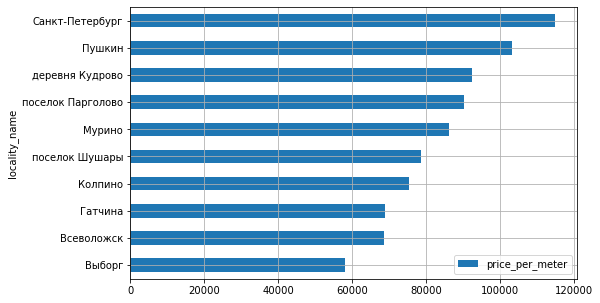

In [86]:
top_10_price.sort_values('price_per_meter', ascending=True).head(10).\
                         plot(y='price_per_meter', kind='barh',figsize=(8,5),grid=True)

##### Вывод: по данным 10 наибольших обьявлений
* самая высокая стоимостью жилья - Санкт-Петербург - 114849.01 руб/кв.м.
* самая низкая стоимостью жилья - Выборг - 58141.91 руб/кв.м.

<a id="4_6"></a>

##### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

In [87]:
df.dropna(subset=['cityCenters_nearest'])# удалили нулевые строки

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_of_week_exposition,month_exposition,year_exposition,floor_status,total_living_area_ratio,total_kitchen_area_ratio,big_number_ads_town
0,20,NaN,108.00,2019-03-07,3.00,2.70,16.00,51.00,8,False,False,False,25.00,0.00,Санкт-Петербург,18863.0,16028.00,1.0,482.0,2.0,755.0,NaN,120370.37,Thursday,March,2019,другой,0.47,0.23,Санкт-Петербург
1,7,3350000.00,40.40,2018-12-04,1.00,2.65,11.00,18.60,1,False,False,False,11.00,2.00,поселок Шушары,12817.0,18603.00,0.0,NaN,0.0,NaN,81.00,82920.79,Tuesday,December,2018,первый,0.46,0.27,Лен.область
2,10,5196000.00,56.00,2015-08-20,2.00,2.65,5.00,34.30,4,False,False,False,8.30,0.00,Санкт-Петербург,21741.0,13933.00,1.0,90.0,2.0,574.0,NaN,92785.71,Thursday,August,2015,другой,0.61,0.15,Санкт-Петербург
3,0,NaN,NaN,2015-07-24,3.00,2.65,14.00,54.00,9,False,False,False,0.00,0.00,Санкт-Петербург,28098.0,6800.00,2.0,84.0,3.0,234.0,424.00,408176.10,Friday,July,2015,другой,0.34,0.00,Санкт-Петербург
4,2,10000000.00,100.00,2018-06-19,2.00,NaN,14.00,32.00,13,False,False,False,41.00,0.00,Санкт-Петербург,31856.0,8098.00,2.0,112.0,1.0,48.0,121.00,100000.00,Tuesday,June,2018,другой,0.32,0.41,Санкт-Петербург
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23690,3,5500000.00,52.00,2018-07-19,2.00,2.65,5.00,31.00,2,False,False,False,6.00,0.00,Санкт-Петербург,20151.0,6263.00,1.0,300.0,0.0,NaN,15.00,105769.23,Thursday,July,2018,другой,0.60,0.12,Санкт-Петербург
23691,11,9470000.00,72.90,2016-10-13,2.00,2.75,25.00,40.30,7,False,False,False,10.60,1.00,Санкт-Петербург,19424.0,4489.00,0.0,NaN,1.0,806.0,NaN,129903.98,Thursday,October,2016,другой,0.55,0.15,Санкт-Петербург
23693,9,4600000.00,62.40,2016-08-05,3.00,2.60,9.00,40.00,8,False,False,False,8.00,0.00,Петергоф,45602.0,34104.00,1.0,352.0,1.0,675.0,239.00,73717.95,Friday,August,2016,другой,0.64,0.13,Лен.область
23694,9,9700000.00,NaN,2017-03-21,3.00,NaN,5.00,73.30,3,False,False,False,13.83,0.00,Санкт-Петербург,24665.0,4232.00,1.0,796.0,3.0,381.0,NaN,72490.85,Tuesday,March,2017,другой,0.55,0.10,Санкт-Петербург


In [88]:

df['cityCenters_nearest_km'] = df['cityCenters_nearest']/1000 # метры в киллометры
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].round() #округляем


In [89]:
pd.qcut(df['cityCenters_nearest_km'], q=4) # определили сегменты расстояний, думаю, что до 9 км это центр

0         (13.0, 16.0]
1         (16.0, 66.0]
2         (13.0, 16.0]
3        (-0.001, 9.0]
4        (-0.001, 9.0]
             ...      
23694    (-0.001, 9.0]
23695              NaN
23696              NaN
23697      (9.0, 13.0]
23698              NaN
Name: cityCenters_nearest_km, Length: 23699, dtype: category
Categories (4, interval[float64]): [(-0.001, 9.0] < (9.0, 13.0] < (13.0, 16.0] < (16.0, 66.0]]

In [90]:
def centr(row):
    if row['locality_name'] == 'Санкт-Петербург' and row['cityCenters_nearest_km'] <= 9:
        return 'Центр'
    else:
        return 'не центр'

In [91]:
df['centr'] = df.apply(centr, axis=1)

<AxesSubplot:xlabel='cityCenters_nearest_km,centr'>

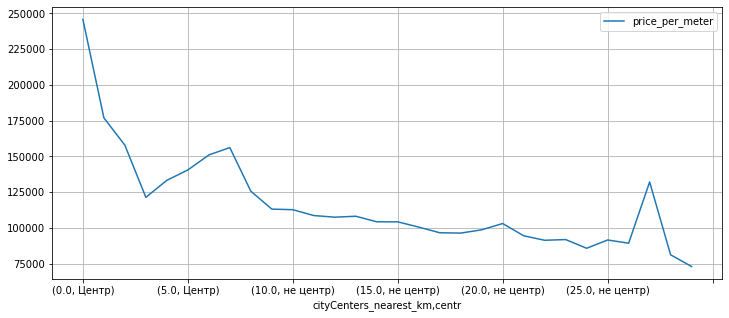

In [92]:
(
    df.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index=['cityCenters_nearest_km','centr'], values='price_per_meter')
    .plot(grid=True, figsize=(12, 5))
) 

##### Вывод: 
* самая высокая стоимость жилья в центре Санкт-Петербурга и уменьшается с удаленностью от центра


<a id="4_7"></a>

##### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [93]:
city_center = df.query('cityCenters_nearest_km <= 9')
cor_in_center = city_center.corr()\
        .sort_values('last_price', ascending=False)\
        .filter(items = ['last_price'])\
        .reset_index()
cor_in_center

,index,last_price
0,last_price,1.00
1,total_area,0.74
2,living_area,0.61
3,rooms,0.51
4,kitchen_area,0.41
5,price_per_meter,0.25
6,ceiling_height,0.25
7,days_exposition,0.13
8,total_images,0.12
9,total_living_area_ratio,0.07


<AxesSubplot:>

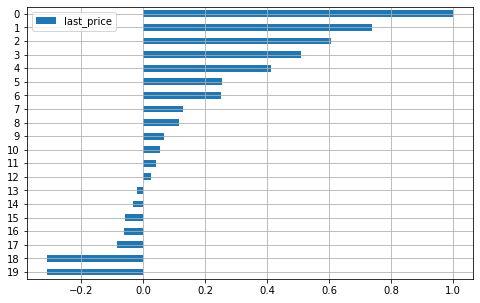

In [94]:
cor_in_center.sort_values('last_price', ascending=True).\
                         plot(y='last_price', kind='barh',figsize=(8,5),grid=True)

<AxesSubplot:xlabel='total_area,centr'>

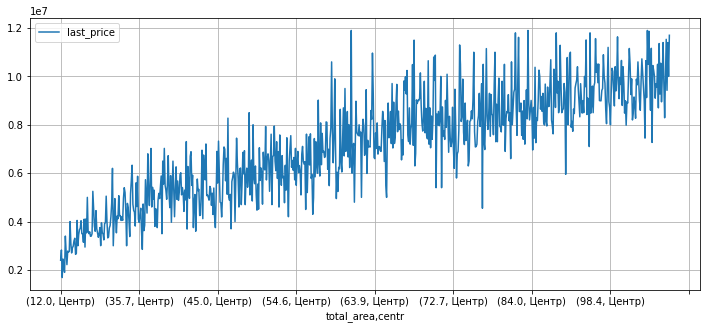

In [95]:
(
    df.query('centr == "Центр"')
    .pivot_table(index=['total_area', 'centr'], values='last_price')
    .plot(grid=True, figsize=(12, 5))
) 

<AxesSubplot:xlabel='living_area,centr'>

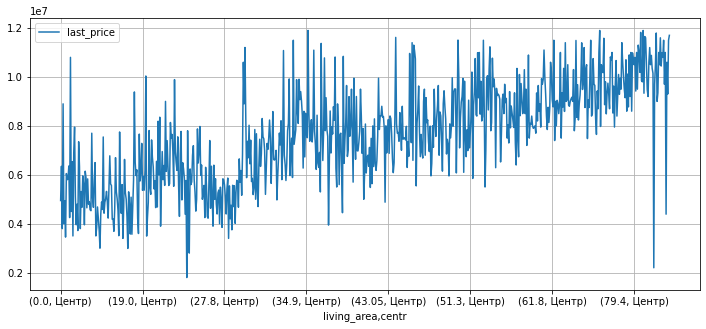

In [96]:
(
    df.query('centr == "Центр"')
    .pivot_table(index=['living_area','centr'], values='last_price')
    .plot(grid=True, figsize=(12, 5))
) 

<AxesSubplot:xlabel='rooms'>

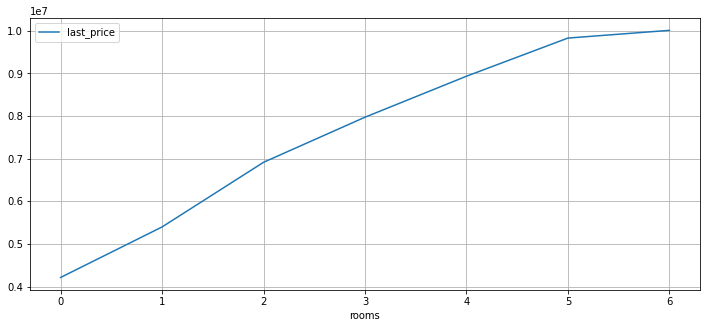

In [97]:
(
    df.query('centr == "Центр"')
    .pivot_table(index='rooms', values='last_price')
    .plot(grid=True, figsize=(12, 5))
) 

<AxesSubplot:xlabel='kitchen_area,centr'>

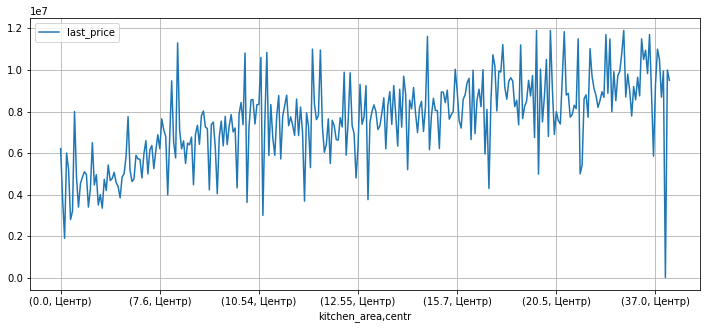

In [98]:
(
    df.query('centr == "Центр"')
    .pivot_table(index=['kitchen_area','centr'], values='last_price')
    .plot(grid=True, figsize=(12, 5))
) 

<AxesSubplot:xlabel='price_per_meter,centr'>

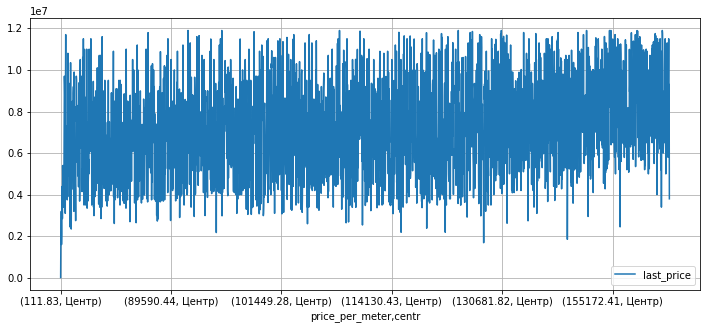

In [99]:
(
    df.query('centr == "Центр"')
    .pivot_table(index=['price_per_meter','centr'], values='last_price')
    .plot(grid=True, figsize=(12, 5))
) 

<AxesSubplot:xlabel='ceiling_height,centr'>

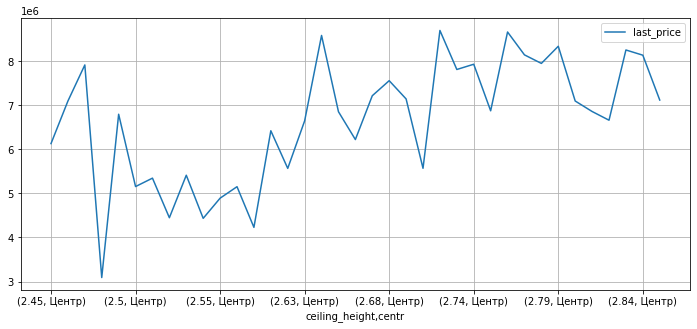

In [100]:
(
    df.query('centr == "Центр"')
    .pivot_table(index=['ceiling_height','centr'], values='last_price')
    .plot(grid=True, figsize=(12, 5))
) 

<AxesSubplot:xlabel='days_exposition,centr'>

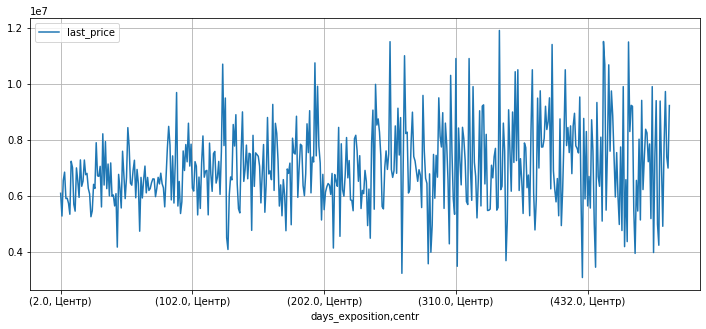

In [101]:
(
    df.query('centr == "Центр"')
    .pivot_table(index=['days_exposition','centr'], values='last_price')
    .plot(grid=True, figsize=(12, 5))
) 

<AxesSubplot:xlabel='total_images,centr'>

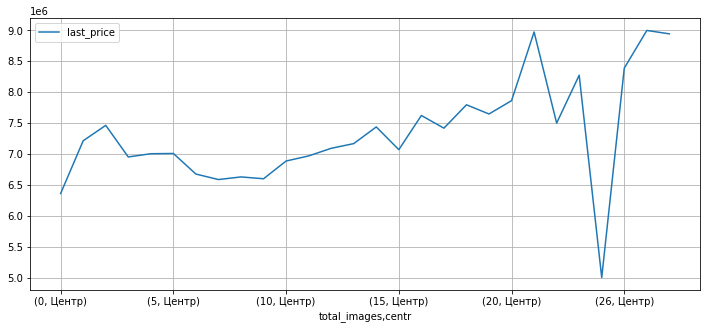

In [102]:
(
    df.query('centr == "Центр"')
    .pivot_table(index=['total_images','centr'], values='last_price')
    .plot(grid=True, figsize=(12, 5))
) 

<AxesSubplot:xlabel='total_living_area_ratio,centr'>

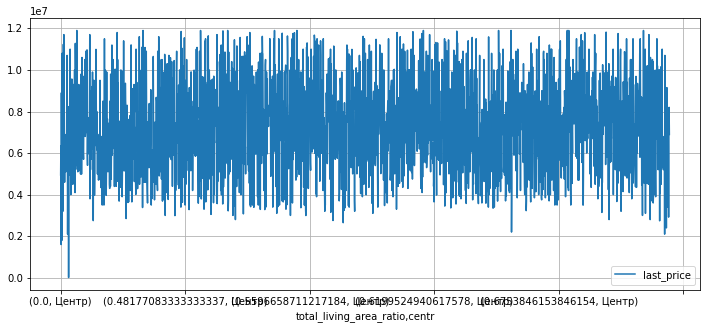

In [103]:
(
    df.query('centr == "Центр"')
    .pivot_table(index=['total_living_area_ratio','centr'], values='last_price')
    .plot(grid=True, figsize=(12, 5))
) 

<AxesSubplot:xlabel='floor,centr'>

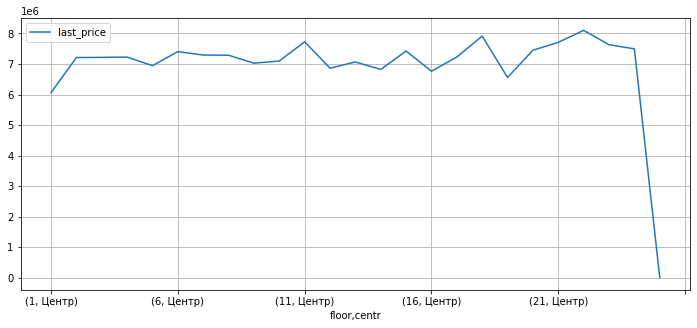

In [104]:
(
    df.query('centr == "Центр"')
    .pivot_table(index=['floor','centr'], values='last_price')
    .plot(grid=True, figsize=(12, 5))
) 

<AxesSubplot:xlabel='balcony,centr'>

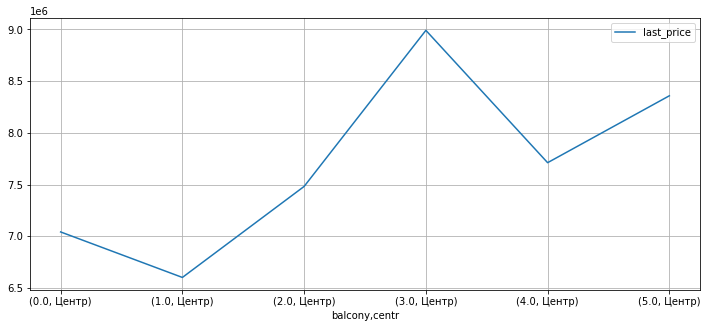

In [105]:
(
    df.query('centr == "Центр"')
    .pivot_table(index=['balcony','centr'], values='last_price')
    .plot(grid=True, figsize=(12, 5))
) 

##### Вывод: для центра Санкт - Петербурга
в центре имеет значение:
* общая площадь
* жилая площадь
* кол-во комнат
##### Выводы для центра немного отличаются от общих, напомню, что по общим выводам значение имела удаленность от  центра и кол-во комнат(соответственно общая площадь.)

<a id="5"></a>

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

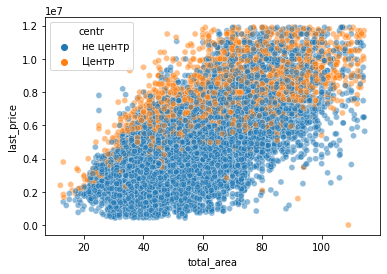

In [106]:
import seaborn as sns

sns.scatterplot(data=df, x="total_area", y="last_price", hue="centr", alpha=0.5)

## 5. Общий вывод

Провели исследование объявлений о продаже квартир, изучили  следующие параметры: площадь, цена, число комнат, высота потолков,
время продажи квартиры.
Обнаружили, что обычно, продажа квартиры занимает около 4-х месяцев, продажи прошли очень быстро - если продажа состоялась менее чем за 3 месяца, продажи прошли необычно долго - если продажа состоялась за 6 месяцев.

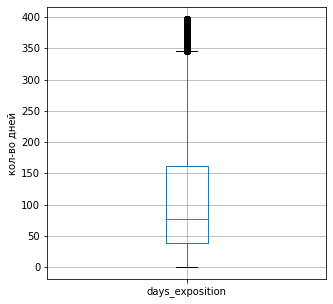

In [107]:
del_out(df,'days_exposition',1,5,5).set_ylabel('кол-во дней')
plt.show()

Уберали редкие и выбивающиеся значения. 
Изучили, зависит ли цена от площади, числа комнат, удалённости от центра, от того, на каком этаже расположена квартира: первом, последнем или другом. 
Выбрали 10 населённых пунктов с наибольшим числом объявлений. Выделили населённые пункты с самой высокой и низкой стоимостью жилья. 
Поличилось, что:
* самая высокая стоимостью жилья - Санкт-Петербург - 114849.01 руб/кв.м.
* самая низкая стоимостью жилья - Выборг - 58141.91 руб/кв.м.

<AxesSubplot:ylabel='locality_name'>

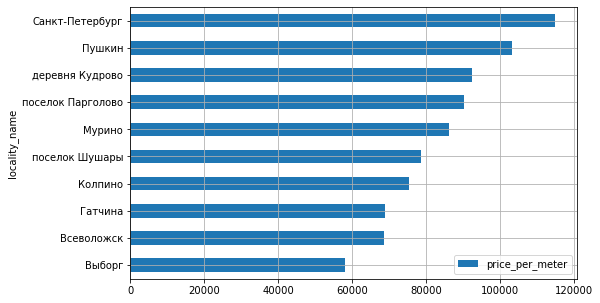

In [108]:
top_10_price.sort_values('price_per_meter', ascending=True).head(10).\
                         plot(y='price_per_meter', kind='barh',figsize=(8,5),grid=True)

Изучили предложения квартир, выяснили, какая область входит в центр, изучили как цена зависит от удалённости от центра. 

<AxesSubplot:xlabel='cityCenters_nearest_km,centr'>

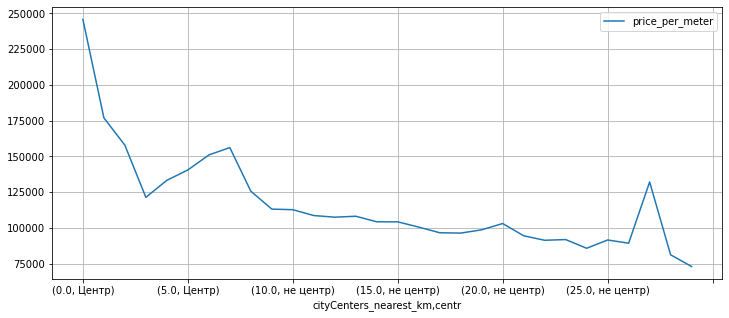

In [109]:
(
    df.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index=['cityCenters_nearest_km','centr'], values='price_per_meter')
    .plot(grid=True, figsize=(12, 5))
) 

### Общий вывод:
* Квартиры в центре и в Питере обычно дороже, чем квартиры вне центра и за Питером.
* Основное значение имеет общая площадь, цена за кв.метр и удаленность от центра, а также этажность квартиры.